In [1]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta
import math
import matplotlib as mpl
import numpy as np
import talib as ta

In [2]:
StartingAmount = 500_000

import libaries

In [3]:
stock = "MSFT"
df = pd.read_csv("C:/Users/rohan/Desktop/SchoolWork/StockMarketSimulationIQP/RohanCode/Data/30y_stock_csvs/{}.csv".format(stock))
df = df.rename(columns={"CLOSE": "Adj Close", "VOLUME": "Volume"})
df

,Datetime,OPEN,HIGH,LOW,Adj Close,Volume
0,1992-02-21 20:00:00,2.437500,2.468750,2.369792,2.385417,91118400
1,1992-02-24 20:00:00,2.385417,2.427083,2.354167,2.393229,59049600
2,1992-02-25 20:00:00,2.395833,2.427083,2.359375,2.411458,57388800
3,1992-02-26 20:00:00,2.416667,2.541667,2.416667,2.541667,100670400
4,1992-02-27 20:00:00,2.557292,2.609375,2.557292,2.601563,79579200
...,...,...,...,...,...,...
7552,2022-02-14 20:00:00,293.769989,296.760010,291.350006,295.000000,36359500
7553,2022-02-15 20:00:00,300.010010,300.799988,297.019989,300.470001,27379500
7554,2022-02-16 20:00:00,298.369995,300.869995,293.679993,299.500000,29982100
7555,2022-02-17 20:00:00,296.359985,296.799988,290.000000,290.730011,32461600


In [4]:
df['Price_Moving_Avg'] = df['Adj Close'].rolling(window=30).mean()
df['Vol_Moving_Avg'] = df['Volume'].rolling(window=30).mean()
df['ADX'] = ta.ADX(df['HIGH'],df['LOW'],df['Adj Close'], timeperiod=14)
df['RSI'] = ta.RSI(df['Adj Close'], timeperiod=14)


In [5]:
daysHistory = len(df['Adj Close'])
df = df[df['Price_Moving_Avg'].notna()]

df

,Datetime,OPEN,HIGH,LOW,Adj Close,Volume,Price_Moving_Avg,Vol_Moving_Avg,ADX,RSI
29,1992-04-02 20:00:00,2.510417,2.531250,2.432292,2.437500,56918400,2.547396,5.938256e+07,31.360037,42.704765
30,1992-04-03 20:00:00,2.447917,2.484375,2.432292,2.447917,59534400,2.549479,5.832976e+07,30.160993,43.851029
31,1992-04-06 19:00:00,2.453125,2.533854,2.453125,2.526042,40123200,2.553906,5.769888e+07,28.036669,51.661729
32,1992-04-07 19:00:00,2.541667,2.552083,2.411458,2.416667,72758400,2.554080,5.821120e+07,26.780633,42.705167
33,1992-04-08 19:00:00,2.411458,2.447917,2.359375,2.442708,105388800,2.550781,5.836848e+07,26.378133,45.143674
...,...,...,...,...,...,...,...,...,...,...
7552,2022-02-14 20:00:00,293.769989,296.760010,291.350006,295.000000,36359500,307.113000,4.389927e+07,27.425511,40.631420
7553,2022-02-15 20:00:00,300.010010,300.799988,297.019989,300.470001,27379500,305.970334,4.384975e+07,27.245521,45.212545
7554,2022-02-16 20:00:00,298.369995,300.869995,293.679993,299.500000,29982100,304.986667,4.376001e+07,27.380419,44.555960
7555,2022-02-17 20:00:00,296.359985,296.799988,290.000000,290.730011,32461600,304.131667,4.350692e+07,27.822696,39.036305


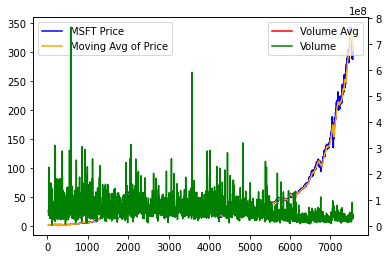

In [6]:
close_price = df["Adj Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]
volumePlot = df['Volume']
rsiPlot = df['RSI']
adxPlot = df['ADX']
mpl.rc('figure',figsize=(15,10))
#mpl.style.use('ggplot')

close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
vmagplot.plot(secondary_y=True,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=True,legend =False,color = 'green')
mpl.pyplot.legend(loc="upper right")
mpl.pyplot.show()
#AddPriceMoving Avg

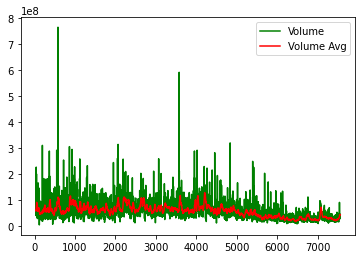

In [7]:

volumePlot.plot(label ='Volume',secondary_y=False,legend =False,color = 'green')
vmagplot.plot(secondary_y=False,label='Volume Avg',legend = True,color='red')
mpl.pyplot.legend()
mpl.pyplot.show()

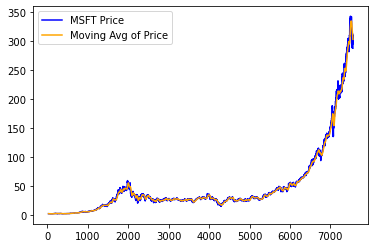

In [8]:
close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
#mpl.pyplot.legend()
mpl.pyplot.show()

In [9]:
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
# adj close . lt - Price moving

df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

df

<ipython-input-9-8028a4bc7bdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
<ipython-input-9-8028a4bc7bdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])


,Datetime,OPEN,HIGH,LOW,Adj Close,Volume,Price_Moving_Avg,Vol_Moving_Avg,ADX,RSI,Price Lower than MAVG,Volume Higher than MAVG
29,1992-04-02 20:00:00,2.510417,2.531250,2.432292,2.437500,56918400,2.547396,5.938256e+07,31.360037,42.704765,True,True
30,1992-04-03 20:00:00,2.447917,2.484375,2.432292,2.447917,59534400,2.549479,5.832976e+07,30.160993,43.851029,True,False
31,1992-04-06 19:00:00,2.453125,2.533854,2.453125,2.526042,40123200,2.553906,5.769888e+07,28.036669,51.661729,True,True
32,1992-04-07 19:00:00,2.541667,2.552083,2.411458,2.416667,72758400,2.554080,5.821120e+07,26.780633,42.705167,True,False
33,1992-04-08 19:00:00,2.411458,2.447917,2.359375,2.442708,105388800,2.550781,5.836848e+07,26.378133,45.143674,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
7552,2022-02-14 20:00:00,293.769989,296.760010,291.350006,295.000000,36359500,307.113000,4.389927e+07,27.425511,40.631420,True,True
7553,2022-02-15 20:00:00,300.010010,300.799988,297.019989,300.470001,27379500,305.970334,4.384975e+07,27.245521,45.212545,True,True
7554,2022-02-16 20:00:00,298.369995,300.869995,293.679993,299.500000,29982100,304.986667,4.376001e+07,27.380419,44.555960,True,True
7555,2022-02-17 20:00:00,296.359985,296.799988,290.000000,290.730011,32461600,304.131667,4.350692e+07,27.822696,39.036305,True,True


In [10]:
z=1
PL=0.00
Total_Gain =0
starting_price =1
#PG -> Per_Gain

Start_Price = (df['Adj Close'].head(1))
Start_Price = float(Start_Price)
print("Start Price:", Start_Price)

End_Price = (df['Adj Close'].tail(1))
End_Price = float(End_Price)
print("End Price:", End_Price)

Return = (PL/Start_Price)
Return_Per = "{:.2%}".format(Return)



benchRe = End_Price - Start_Price
benchREP = (benchRe/Start_Price) 
TotalPro = (benchREP) * StartingAmount
print(TotalPro)

Start Price: 2.4375
End Price: 287.92999267578125
58562562.600160256


In [11]:
index =0
# for date_var,row in df.iterrows():
#     maxValue = df.iloc[index-30:index]['Adj Close'].max()
#     if(math.isnan(maxValue)):
#         maxValue = 0
#     if row['Volume Higher than MAVG']==1:
#         if row['Price Lower than MAVG']==1:
#             if z==1:
#                 print(date_var,row['Adj Close'], '- BUY')
#                 close_adj = row['Adj Close']
#                 starting_price = close_adj
#                 z -=1
                
#     elif(row['Adj Close']>=(maxValue) and maxValue !=0):
#         if z==1:
#                 print(date_var,row['Adj Close'], '- BUYING BC OF TREND INCREASE')
#                 close_adj = row['Adj Close']
#                 starting_price = close_adj
#                 z -=1
#     else:
#         if row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
#                 if z==0:
#                     print(date_var,row['Adj Close'],'- SELL')
#                     close_adj = row['Adj Close']
#                     single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
#                     Total_Gain += single_trade_percent_gain

#                     print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                     print()
#                     z+=1
#         else:
#             if (((row['Adj Close']- starting_price)/starting_price) * 100) > .5:
#                 if z==0:
#                     print(date_var,row['Adj Close'],'- SELL DUE TO PRICE INCREASE')
#                     close_adj = row['Adj Close']
#                     single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
#                     Total_Gain += single_trade_percent_gain
#                     print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#                     print()
#                     z+=1
#     index +=1

for date_var,row in df.iterrows():
    maxValue = df.iloc[index-30:index]['Adj Close'].max()
    if(math.isnan(maxValue)):
        maxValue = 0

    if(z==1):
        if row['Volume Higher than MAVG']==1:
            if row['Price Lower than MAVG']==1:
                if z==1:
                    print(row['Datetime'],row['Adj Close'], '- BUY')
                    close_adj = row['Adj Close']
                    starting_price = close_adj
                    z -=1
    elif(row['ADX']>25):
        if(z==1):
            if(row['RSI']<=30):
                    print(row['Datetime'],row['Adj Close'], '- Buy due to Over-Buy')
                    close_adj = row['Adj Close']
                    starting_price = close_adj
                    z -=1
            elif(row['Adj Close']>=(maxValue) and maxValue !=0):
                    print(row['Datetime'],row['Adj Close'], '- BUYING BC OF TREND INCREASE')
                    close_adj = row['Adj Close']
                    starting_price = close_adj
                    z -=1
        else:
            if(z==0):
                if (((row['Adj Close']- starting_price)/starting_price) * 100) > .5:
                        if z==0:
                            print(row['Datetime'],row['Adj Close'],'- SELL DUE TO PRICE INCREASE')
                            close_adj = row['Adj Close']
                            single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                            Total_Gain += single_trade_percent_gain
                            print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                            print()
                            z+=1
                elif row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
                        if z==0:
                            print(row['Datetime'],row['Adj Close'],'- SELL')
                            close_adj = row['Adj Close']
                            single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                            Total_Gain += single_trade_percent_gain

                            print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                            print()
                            z+=1
                else:
                    if (row['RSI']>=60):
                        if z==0:
                            print(row['Datetime'],row['Adj Close'],'- Oversell because of RSI')
                            close_adj = row['Adj Close']
                            single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                            Total_Gain += single_trade_percent_gain
                            print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                            print()
                            z+=1
    index +=1


#ADX
    #Tells how strong the trend is
        #Anything above 30 is a strong trend

#RSI
    #Tells if there is an over buy or over sell
        #From 0-30
            #Over buy
        #From 30-70
            #Normal
        #70-100
            #Over sell


# for date_var,row in df.iterrows():
#     if(row['ADX']>=30):
#         if(row['RSI']<=30 and z == 1):
#             print(date_var,row['Adj Close'], '-OVER BUY TIME')
#             close_adj = row['Adj Close']
#             starting_price = close_adj
#             z -=1

#         if(row['RSI']>=70 and z == 0):
#             print(date_var,row['Adj Close'],'-OVER SELL TIME')
#             close_adj = row['Adj Close']
#             single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
#             Total_Gain += single_trade_percent_gain
#             print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
#             print()
#             z+=1

if(z==0):
    print(row['Datetime'],row['Adj Close'],'- SELL DUE TO LAST DAY')
    close_adj = row['Adj Close']
    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
    Total_Gain += single_trade_percent_gain
    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")

Hold_Return = (End_Price - Start_Price)
Hold_Return_Per = "{:.2%}".format((End_Price-Start_Price)/Start_Price)
TotalReturn = (Total_Gain/100) * StartingAmount
print()
print("The return for holding start to end was: "+str(Hold_Return_Per)+".")
print()
print("Return percentage from all trades: " + str(round(Total_Gain,2))+"% based on "+str(daysHistory)+" days of data")
print("With a starting amount of: $"+str(round(StartingAmount,3))+" it ended with a profit of: $"+str(round(TotalReturn,3)))
print("This algoritm has gained you: $"+str(round(StartingAmount+TotalReturn,3)))



1992-04-02 20:00:00 2.4375 - BUY
1992-04-06 19:00:00 2.526041984558105 - SELL DUE TO PRICE INCREASE
This trade gain/loss results: 3.63%

1992-04-13 19:00:00 2.447916984558105 - BUY
1992-09-11 19:00:00 2.460937976837158 - SELL DUE TO PRICE INCREASE
This trade gain/loss results: 0.53%

1992-12-02 20:00:00 2.835937976837158 - BUY
1993-06-02 19:00:00 2.992187976837158 - SELL DUE TO PRICE INCREASE
This trade gain/loss results: 5.51%

1993-06-17 19:00:00 2.839843988418579 - BUY
1993-10-07 19:00:00 2.628906011581421 - Oversell because of RSI
This trade gain/loss results: -7.43%

1993-10-22 19:00:00 2.511718988418579 - BUY
1994-05-25 19:00:00 3.28125 - SELL DUE TO PRICE INCREASE
This trade gain/loss results: 30.64%

1994-06-23 19:00:00 3.132812976837158 - BUY
1994-06-27 19:00:00 3.242187976837158 - SELL DUE TO PRICE INCREASE
This trade gain/loss results: 3.49%

1994-06-28 19:00:00 3.207031011581421 - BUY
1994-08-17 19:00:00 3.492187976837158 - SELL DUE TO PRICE INCREASE
This trade gain/loss re